In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from adjustText import adjust_text
import sys
sys.path.insert(0, '../frameaxis')
from semaxis import CoreUtil
from semaxis import SemAxis
import pandas as pd
import logging
import pickle
import numpy as np
import spacy
import string
string.punctuation += '➡•’…'
from collections import Counter

In [3]:
df_intensity_rep = pd.read_csv('second_moment/effect_size_significant_axes_ambience_negative.tsv', sep='\t')
df_intensity_rep.columns = ['axis', 'intens_val', 'intens_p']

In [4]:
df_intensity_rep.head(2)

,axis,intens_val,intens_p
0,"('loud', 'soft')",0.007393,0.0
1,"('back', 'front')",0.006623,0.0


In [5]:
len(df_intensity_rep)

209

In [6]:
df_intensity_dem = pd.read_csv('second_moment/effect_size_significant_axes_ambience_positive.tsv', sep='\t')
df_intensity_dem.columns = ['axis', 'intens_val', 'intens_p']

In [7]:
len(df_intensity_dem)

226

In [8]:
df_bias_rep = pd.read_csv('average/effect_size_significant_axes_ambience_negative.tsv', sep='\t')
df_bias_rep.columns = ['axis', 'bias_val', 'bias_p']

In [9]:
len(df_bias_rep)

413

In [10]:
df_bias_dem = pd.read_csv('average/effect_size_significant_axes_ambience_positive.tsv', sep='\t')
df_bias_dem.columns = ['axis', 'bias_val', 'bias_p']

In [11]:
df_bias_dem.head()

,axis,bias_val,bias_p
0,"('tasteful', 'tasteless')",-0.060033,0.0
1,"('beautiful', 'ugly')",-0.054768,0.0
2,"('elegant', 'inelegant')",-0.053023,0.0
3,"('pleasant', 'unpleasant')",-0.052821,0.0
4,"('comfortable', 'uncomfortable')",-0.047832,0.0


In [12]:
len(df_bias_dem)

814

# 1 high intensity per aspect

In [13]:
import glob
import os

pos_biases = []
pos_frames = []
for afile in sorted(glob.glob('second_moment/significant*positive.tsv')):
    if 'miscellaneous' in afile:
        continue
    df_i = pd.read_csv(afile, sep='\t')
    filename = os.path.basename(afile)
    significant_axis = df_i.sort_values('diff_a_b', ascending=False).iloc[0]['axis']
    pos_frames.append(significant_axis)
    
    df_b = pd.read_csv('average/{}'.format(filename), sep='\t')
    bias = df_b.query('axis==@significant_axis').iloc[0]['diff_a_b']
    pos_biases.append(bias)


neg_biases = []
neg_frames = []
for afile in sorted(glob.glob('second_moment/significant*negative.tsv')):
    if 'miscellaneous' in afile:
        continue    
    df_i = pd.read_csv(afile, sep='\t')
    filename = os.path.basename(afile)
    significant_axis = df_i.sort_values('diff_a_b', ascending=False).iloc[0]['axis']
    neg_frames.append(significant_axis)
    
    df_b = pd.read_csv('average/{}'.format(filename), sep='\t')
    bias = df_b.query('axis==@significant_axis').iloc[0]['diff_a_b']
    neg_biases.append(bias)


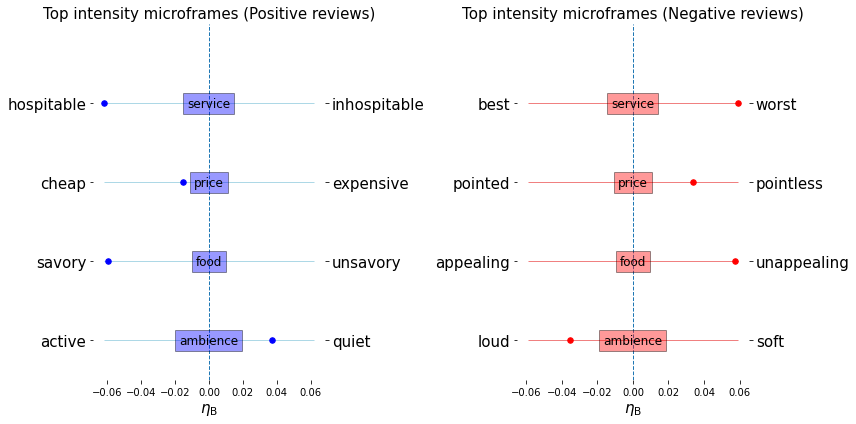

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

color = 'blue'
title = 'Top intensity microframes (Positive reviews)'
top_val_dem, top_axis_dem = (pos_biases, pos_frames)

aspects = ['ambience', 'miscellaneous', 'food', 'price', 'service']
aspects = ['ambience', 'food', 'price', 'service']

dem_max = max(top_val_dem)
dem_min = min(top_val_dem)
ax1.yaxis.tick_left()

y = np.arange(len(top_val_dem))
for i in range(len(top_val_dem)):
    ax1.hlines(i, xmin=min(-dem_max,dem_min), xmax=max(-dem_min,dem_max), linewidth=1,color='lightblue', zorder=1)
    ax1.text(0, i, aspects[i], 
             fontsize=12, horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='blue', alpha=0.4))    
ax1.scatter(top_val_dem, y, color=color, s=30, label='Bias', zorder=2)
ax1.set_yticks(y)
ax1.set_yticklabels([eval(item)[0] for item in top_axis_dem], fontsize=15)
ax1.set_ylim(-0.5,len(top_val_dem))
ax1.vlines(0, ymin=-0.5, ymax=len(top_val_dem), linestyle='--', linewidth=1)
ax1.set_xlabel('$\eta_{\mathrm{B}}$', fontsize=15)

ax_t1 = ax1.twinx()
ax_t1.yaxis.tick_right()
ax_t1.set_yticks(y)
ax_t1.set_yticklabels([eval(item)[1] for item in top_axis_dem], fontsize=15)
ax_t1.set_ylim(-0.5,len(top_val_dem))
ax_t1.set_title(title, fontsize=15)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax_t1.spines["top"].set_visible(False)
ax_t1.spines["left"].set_visible(False)
ax_t1.spines["right"].set_visible(False)
ax_t1.spines["bottom"].set_visible(False)

color = 'red'
title = 'Top intensity microframes (Negative reviews)'
top_val_rep, top_axis_rep = (neg_biases, neg_frames)    
rep_max = max(top_val_rep)
rep_min = min(top_val_rep)
ax2.yaxis.tick_left()
y = np.arange(len(top_val_rep))
for i in range(len(top_val_rep)):
    ax2.hlines(i, xmin=min(rep_min,-rep_max), xmax=max(rep_max,-rep_min), linewidth=1,color='lightcoral', zorder=1)
    ax2.text(0, i, aspects[i], 
             fontsize=12, horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='red', alpha=0.4))
ax2.scatter(top_val_rep, y, color=color, s=30, label='Bias', zorder=2)

ax2.set_yticks(y)
ax2.set_yticklabels([eval(item)[0] for item in top_axis_rep], fontsize=15)
ax2.set_ylim(-0.5,len(top_val_rep))
#     for i in range(10):
#         print(i)
#         ax2.set_yticks([i])
#         ax2.set_yticklabels([eval(top_axis_rep[i])[0]], fontsize=15)
ax2.set_ylim(-0.5,len(top_val_rep))
ax2.vlines(0, ymin=-0.5, ymax=len(top_val_rep), linestyle='--', linewidth=1)
#     ax2.legend(prop={'size': 15})
ax2.set_xlabel('$\eta_{\mathrm{B}}$', fontsize=15)

ax_t2 = ax2.twinx()
ax_t2.yaxis.tick_right()
ax_t2.set_yticks(y)
ax_t2.set_yticklabels([eval(item)[1] for item in top_axis_rep], fontsize=15)
ax_t2.set_ylim(-0.5,len(top_val_rep))
ax2.set_title(title, fontsize=15)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax_t2.spines["top"].set_visible(False)
ax_t2.spines["left"].set_visible(False)
ax_t2.spines["right"].set_visible(False)
ax_t2.spines["bottom"].set_visible(False)



plt.tight_layout()
plt.savefig('review_frames.pdf', format='pdf')

# 2 high intensity per aspect

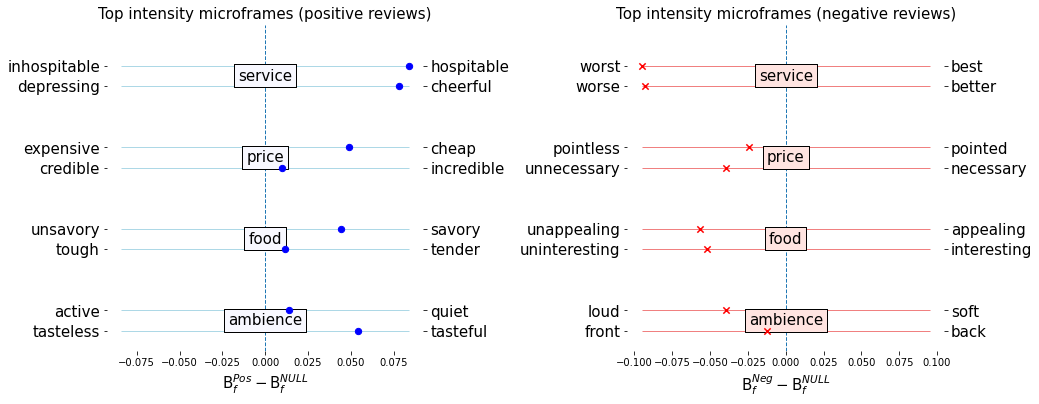

In [15]:
from matplotlib import gridspec

# plot it
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 3]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[2])

# fig, (ax1, _, ax2) = plt.subplots(1,3, figsize=(15,6))

HEIGHT = 0.5
TOP_k = 2
aspects = ['ambience', 'food', 'price', 'service']

bs = []
ys = []
ylabels = []
sentiment = "positive"

for a_index, aspect in enumerate(aspects):
    df_i = pd.read_csv(f'second_moment/significant_axes_{aspect}_{sentiment}.tsv', sep='\t')
    significant_axes = list(df_i.sort_values('diff_a_b', ascending=False).iloc[0:TOP_k]['axis'])
    
    for s_index, axis in enumerate(significant_axes):
        df_b_p = pd.read_csv(f'average/significant_axes_{aspect}_{sentiment}.tsv', sep='\t')
        bias_p = df_b_p.query('axis==@axis').iloc[0]['diff_a_b']

        df_b_n = pd.read_csv(f'average/significant_axes_{aspect}_negative.tsv', sep='\t')
        bias_n = df_b_n.query('axis==@axis').iloc[0]['diff_a_b']        
        
        bias = bias_p-bias_n
        
        if bias < 0:
            bias = -bias
            r, l = eval(axis)
            axis = str((l,r))
        
        bs.append(bias)
        
        ax1.scatter(bias, a_index+(TOP_k-s_index-1)*HEIGHT*.5, color='b', zorder=5, s=40)
        ys.append(a_index+(TOP_k-s_index-1)*HEIGHT*.5)
        ylabels.append(eval(axis))
        ax1.text(0, a_index+HEIGHT*.5/2,aspect, 
             fontsize=15, horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='ghostwhite'))    

for a_index, aspect in enumerate(aspects):
    for s_index in range(TOP_k):
        ax1.hlines(a_index+(TOP_k-s_index-1)*HEIGHT*.5, xmin=min(-max(bs),min(bs)), xmax=max(-min(bs),max(bs)), linewidth=1, color='lightblue', zorder=1)  

ax1.set_yticks(ys)
ax1.set_yticklabels([label[0] for label in ylabels], fontsize=15)
ax1.set_ylim(-HEIGHT/2,len(aspects)-HEIGHT/2)
ax1.vlines(0, ymin=-HEIGHT/2, ymax=len(aspects)-HEIGHT/2, linestyle='--', linewidth=1)
ax1.set_xlabel('$\mathrm{B}_f^{Pos}-\mathrm{B}_f^{NULL}$', fontsize=15)

ax_t1 = ax1.twinx()
ax_t1.yaxis.tick_right()
ax_t1.set_yticks(ys)
ax_t1.set_yticklabels([label[1] for label in ylabels], fontsize=15)
ax_t1.set_ylim(-HEIGHT/2,len(aspects)-HEIGHT/2)
ax_t1.set_title(f'Top intensity microframes ({sentiment} reviews)', fontsize=15)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax_t1.spines["top"].set_visible(False)
ax_t1.spines["left"].set_visible(False)
ax_t1.spines["right"].set_visible(False)
ax_t1.spines["bottom"].set_visible(False)


bs = []
ys = []
ylabels = []
sentiment = 'negative'

for a_index, aspect in enumerate(aspects):
    df_i = pd.read_csv(f'second_moment/significant_axes_{aspect}_{sentiment}.tsv', sep='\t')
    significant_axes = list(df_i.sort_values('diff_a_b', ascending=False).iloc[0:TOP_k]['axis'])
    
    for s_index, axis in enumerate(significant_axes):
        df_b = pd.read_csv(f'average/significant_axes_{aspect}_{sentiment}.tsv', sep='\t')
        bias_n = df_b.query('axis==@axis').iloc[0]['diff_a_b']

        df_b_p = pd.read_csv(f'average/significant_axes_{aspect}_positive.tsv', sep='\t')
        bias_p = df_b_p.query('axis==@axis').iloc[0]['diff_a_b']  
        
        bias = bias_n-bias_p
        
        if bias > 0:
            bias = -bias
            r, l = eval(axis)
            if (r, l) == ('high', 'low'):
                r, l = l, r
                bias = -bias
            axis = str((l,r))        
        bs.append(bias)
        
        ax2.scatter(bias, a_index+(TOP_k-s_index-1)*HEIGHT*.5, color='r', marker='x', zorder=5, s=40)
        ys.append(a_index+(TOP_k-s_index-1)*HEIGHT*.5)
        ylabels.append(eval(axis))
        ax2.text(0, a_index+HEIGHT*.5/2,aspect, 
             fontsize=15, horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='mistyrose'))    

for a_index, aspect in enumerate(aspects):
    for s_index in range(TOP_k):
        ax2.hlines(a_index+(TOP_k-s_index-1)*HEIGHT*.5, xmin=min(-max(bs),min(bs)), 
                   xmax=max(-min(bs),max(bs)), linewidth=1, color='lightcoral', zorder=1)  

ax2.set_yticks(ys)
ax2.set_yticklabels([label[0] for label in ylabels], fontsize=15)
ax2.set_ylim(-HEIGHT/2,len(aspects)-HEIGHT/2)
ax2.vlines(0, ymin=-HEIGHT/2, ymax=len(aspects)-HEIGHT/2, linestyle='--', linewidth=1)
ax2.set_xlabel('$\mathrm{B}_f^{Neg}-\mathrm{B}_f^{NULL}$', fontsize=15)

ax_t2 = ax2.twinx()
ax_t2.yaxis.tick_right()
ax_t2.set_yticks(ys)
ax_t2.set_yticklabels([label[1] for label in ylabels], fontsize=15)
ax_t2.set_ylim(-HEIGHT/2,len(aspects)-HEIGHT/2)
ax_t2.set_title(f'Top intensity microframes ({sentiment} reviews)', fontsize=15)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax_t2.spines["top"].set_visible(False)
ax_t2.spines["left"].set_visible(False)
ax_t2.spines["right"].set_visible(False)
ax_t2.spines["bottom"].set_visible(False)

plt.savefig(f'review_frames_top_{TOP_k}.pdf', format='pdf')
